# Wine Quality Challenge
We'll be using wine quality dataset. [LINK](https://archive.ics.uci.edu/dataset/186/wine+quality) 

Upon inspecting and researching relevant information from the dataset, I decided to solve the classification problem (whether a wine is good or bad) based on the available features. I decided to use the white variant because it is a larger dataset and I think we can get a better result. 

In [44]:
#first we load the data using pandas
import pandas as pd 

df = pd.read_csv('winequality-white.csv', delimiter=";")

In [3]:
#we can get some first insight of the data using df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As we can see, there are 12 variables. For our problem, the target variable will be a slight variation of the quality variable (instead of int we will use good or bad).
Now let's do some exploratory analysis of the other 11 variables. All variables are float or int, so it looks like we won't have to do much preprocessing (like one-hot-encoding str variables).

In [4]:
df.describe() #get some stats of the variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Apart from the stats I think that plotting an histogram for some of this variables will be useful. For example, we have to decide a threshold as to when a wine is good or bad. We could use the approach of saying that the from a quality of 6 onwards a wine is good, but I'd like to have data to support such a decision. 

<AxesSubplot:xlabel='quality', ylabel='Count'>

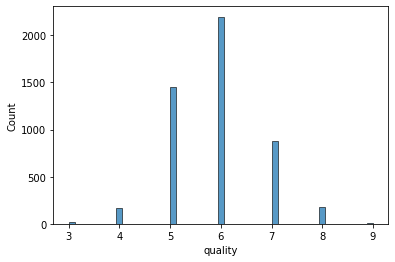

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the distribution of quality scores
sns.histplot(df['quality'])

Looking at the distribution of quality scores, I think that we can use 6 as a threshold. If the quality score of a wine is above 6 (>6) I will define that as a good wine, if it is 6 or below (<=6) I will define as a bad wine. 

The idea behind this threshold is that the "good" label should we exclusive to the best wines. If we set the threshold lower, lets say 5, the majority of wines would be classified as good which misses the point of exclusivity. If we set the threshold higher, lets say 7, we make it too exclusive and we may have very few samples to work with. So I think that 6 is a good compromise between exclusivity and having enough samples to work with.

Now let's see how our different variables affect quality. For that we can plot a barplot for each variable, where x variable is quality and y is the variable we are analysing. 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

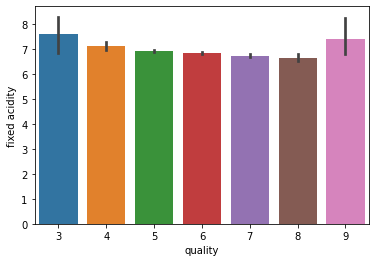

In [7]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

We see that as quality increases, fixed acidity tends to get lower. For quality 3 and 9 we have to be aware that we have fewer samples so our estimation may not be as accurate (hence the bigger whiskers)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

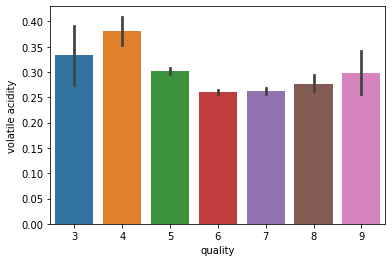

In [8]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

With regards to volatile acidity, we can see that the lower the quality, the higher the volatile acidity is. In this case however, the trend is not as noticeable as with fixed acidity. We can see that as quality gets better, volatile acidity increases slightly, but not to levels as high as for quality <5. 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

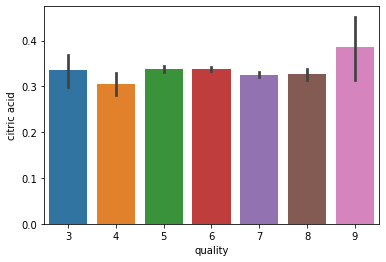

In [9]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

For what we can see, citric acid alone doesn't play a big role in defining quality.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

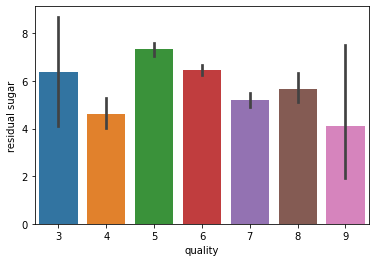

In [10]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

We find similar results with residual sugar, there is not a clear trend.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

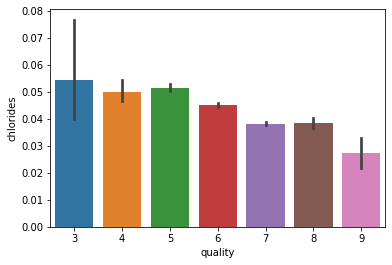

In [11]:
sns.barplot(x = 'quality', y = 'chlorides', data = df)

Here we find another interesting trend. It appears that the higher quality wines have lower chlorides.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

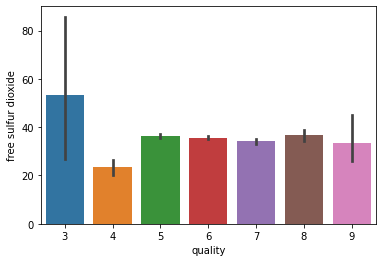

In [12]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

Once again not a clear trend. Despite the finding of lower free sulfur dioxide for wines with a quality of 4, it's not clear that free sulfur dioxide (alone) has a definitive answer for estimating quality.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

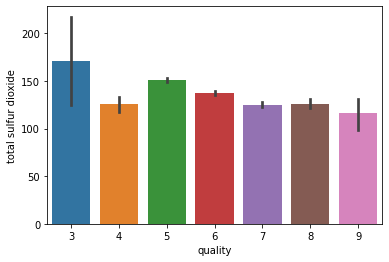

In [13]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

Total sulfur dioxide shows a similar behaviour. (by its name I suspect this 2 variables may be highly correlated but we will find out later)

<AxesSubplot:xlabel='quality', ylabel='density'>

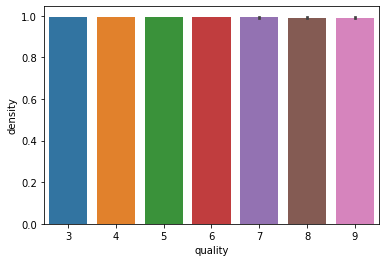

In [14]:
sns.barplot(x = 'quality', y = 'density', data = df)

It is clear that regarding density there is no significative difference for different quality scores.

<AxesSubplot:xlabel='quality', ylabel='pH'>

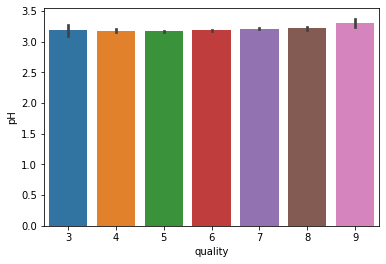

In [15]:
sns.barplot(x = 'quality', y = 'pH', data = df)

Something similar happens with ph, altough one could argue that there is a slight trend to the upside as quality gets better.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

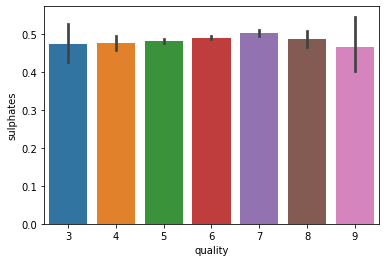

In [16]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)

Not a significative difference with sulphates either.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

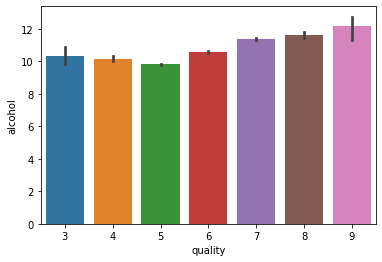

In [18]:
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Lastly, it appears that as quality gets better, there is more alcohol present in wines. 

Now let's plot the correlation matrix between our different variables.

In [19]:
corr = df.corr('pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\teleski\AppData\Local\Temp\ipykernel_13992\2423870097.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25,0.01
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12,0.10
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


We can see that some of the statements that we made when plotting the boxplots were correct:
* Alcohol and quality are positively correlated (alcohol increases as quality increses)
* Fixed and volatile acidity, as well as chlorides, are negatively correlated to quality.
* Free and total sulfur dioxide are highly correlated. 
Some things we missed:
* Density is negatively correlated to quality.

We can also see some other useful insights that we could not have guessed from the plots (because we only looked against quality):
* Density and residual sugar are highly correlated.
* Density and alcohol are highly correlated (negatively). 
* Alcohol is also correlated negatively with residual sugar (makes sense since its correlated to density), chlorides, free and total sulfur dioxide. 

Finally, before getting into the ML models, let's analyse outliers.

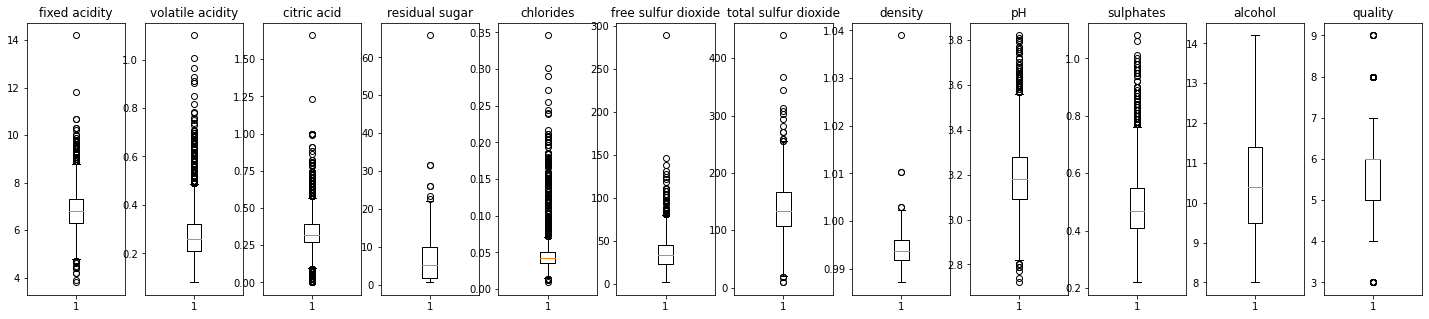

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25,5))

# Itera sobre cada columna de tu DataFrame y grafica un boxplot en su propio subplot
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# Muestra la figura
plt.show()

We see that there are outliers present in every feature. I took the decision of leaving them, with the hypothesis that they're useful for detecting both very good and very bad wines. Maybe very good/bad wines have particular features that make them different from average wines. 

Ok now let's begging preparing the data to use in the ML models

In [56]:
from sklearn.model_selection import train_test_split

#we separate our target variable
x = df.drop('quality', axis = 1)
y = df['quality'].copy()

#we apply the threshold (notice > or <, not >= or <=)
y[y<7] = 0 #bad wine
y[y>6] = 1 #good wine
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 1, stratify= y) #we use stratify so we mantain proportions of 0's and 1's in both sets

In [58]:
#Just to confirm, lets see our target variables for train and test
print(y_train.value_counts())
print(y_test.value_counts())

0    2686
1     742
Name: quality, dtype: int64
0    1152
1     318
Name: quality, dtype: int64


The two models I chose were: random forest and xgboost, since both are flexible and robust algorithms, and also allow me to observe feature importance.
I would like to analyze that importance and retrain it using only the most important features in order to compare results. Maybe we will be able to drop some highly correlated variables 

Due to the imbalance of data, I will analyze as main metrics the confusion matrix and the f1-score since it's a more fair and balanced metric. 
In a more real-life or business oriented example, I would need to hear from the client which the use case of the model will be. 

For example: for a business that sells "recommended wines" it may be more important to be really sure that a wine recommended as good it is actually good, and may be willing to pass on a few wines. In that case, precision would be a better suited metric.

Another example could be a personal example, where I really want to  find out an get to taste all the good wines in the market. My goal of finding every possible good wine leads me to try to minimize all false negatives, as I really don't want to miss on a possibly good wine. In that case, recall would be the best metric to optimize.

Let's begin with RandomForest

Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2686
           1       0.98      0.85      0.91       742

    accuracy                           0.96      3428
   macro avg       0.97      0.92      0.94      3428
weighted avg       0.96      0.96      0.96      3428

Con una matriz de confusion:


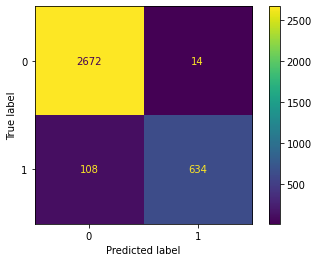

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1152
           1       0.78      0.54      0.64       318

    accuracy                           0.87      1470
   macro avg       0.83      0.75      0.78      1470
weighted avg       0.86      0.87      0.86      1470

Con una matriz de confusion:


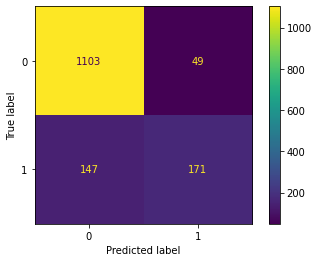

alcohol                 0.191653
density                 0.136000
chlorides               0.084449
residual sugar          0.083034
volatile acidity        0.081246
pH                      0.078190
free sulfur dioxide     0.076404
total sulfur dioxide    0.075379
sulphates               0.070351
citric acid             0.065770
fixed acidity           0.057525
dtype: float64


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators =75)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

y_test_pred = rf.predict(x_test)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

## Feature importances
important_features = pd.Series(data=rf.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

From the metrics, we can see that for the training set we get a 0.94 f1-score and for the testing set we get 0.78. We can infer that we have some overfitting happening.
We can also see that the model struggles mostly with false negatives. That could be in part due to the fact that we have an imbalanced dataset, with more negatives samples than positive samples.

From the feature importance list we see that the main feature is alcohol, with density and chlorides in second and third place respectively. This is in line with what we found out when analysing the correlation matrix. 

Now let's try XGBoost

Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2686
           1       0.97      0.88      0.92       742

    accuracy                           0.97      3428
   macro avg       0.97      0.93      0.95      3428
weighted avg       0.97      0.97      0.97      3428

Con una matriz de confusion:


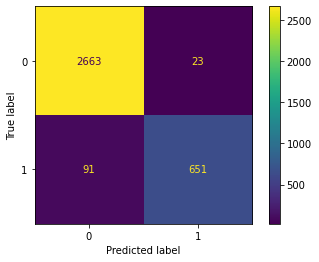

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1152
           1       0.71      0.61      0.65       318

    accuracy                           0.86      1470
   macro avg       0.80      0.77      0.78      1470
weighted avg       0.86      0.86      0.86      1470

Con una matriz de confusion:


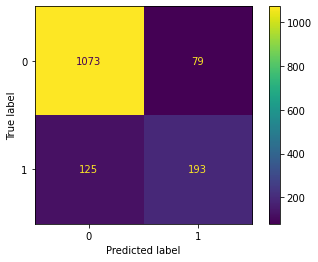

alcohol                 0.325545
volatile acidity        0.081602
sulphates               0.071430
citric acid             0.068673
residual sugar          0.068313
density                 0.067430
free sulfur dioxide     0.067203
fixed acidity           0.065269
pH                      0.064604
chlorides               0.064004
total sulfur dioxide    0.055928
dtype: float32


In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
xgb_clf = XGBClassifier(objective='binary:logistic',random_state=0, max_depth=4)
xgb_clf.fit(x_train, y_train)

y_train_pred = xgb_clf.predict(x_train)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

y_test_pred = xgb_clf.predict(x_test)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## Feature importances
important_features = pd.Series(data=xgb_clf.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

In this case we get similar f1-scores to that of the RandomForest, with 0.94 for training set and 0.78 for testing set. We still show signs of overfitting.

There's a small difference regarding precision and recall for the positive class. Now we have 0.71 precision and 0.61 recall, meanwhile for RandomForest we had 0.78 and 0.54 respectively.

The biggest difference is in the feature importance list. Alcohol now becames much more important (double than for RF), while density and chlorides features are really down the list now. The second most important feature is volatile acidity, followed by sulphates.

I think that the main issues we are facing are data imbalance and high correlation between some of the features. One way to solve data imbalance would be to change the threshold (but i think we would be imbalanced the other way), another way could be getting more positive (good wine) samples. 

To face the high correlation of some features, I propose to drop some of the highly correlated features. We could drop total sulfur dioxide and residual sugar, since they are both highly correlated to other variables, and their importance in the feature importance list is not that high.

Lets test this hypothesis.

In [74]:
#we separate our target variable
drop_attr = ['quality','total sulfur dioxide', 'residual sugar']
x = df.drop(drop_attr, axis = 1)
y = df['quality'].copy()

#we apply the threshold (notice > or <, not >= or <=)
y[y<7] = 0 #bad wine
y[y>6] = 1 #good wine
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 1, stratify= y) #we use stratify so we mantain proportions of 0's and 1's in both sets

Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2686
           1       0.95      0.84      0.89       742

    accuracy                           0.95      3428
   macro avg       0.95      0.91      0.93      3428
weighted avg       0.95      0.95      0.95      3428

Con una matriz de confusion:


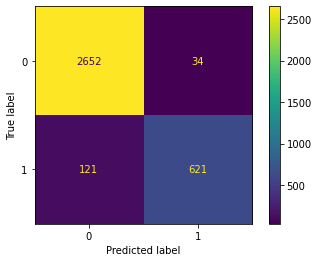

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1152
           1       0.78      0.58      0.67       318

    accuracy                           0.87      1470
   macro avg       0.83      0.77      0.79      1470
weighted avg       0.87      0.87      0.87      1470

Con una matriz de confusion:


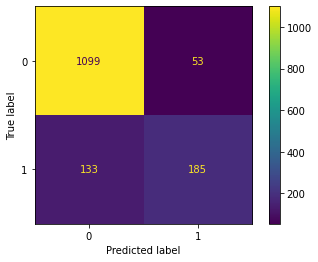

alcohol                0.295687
volatile acidity       0.104403
citric acid            0.096401
density                0.090149
fixed acidity          0.087691
free sulfur dioxide    0.086411
pH                     0.081694
sulphates              0.080085
chlorides              0.077478
dtype: float32


In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
xgb_clf = XGBClassifier(objective='binary:logistic',random_state=0, max_depth=4)
xgb_clf.fit(x_train, y_train)

y_train_pred = xgb_clf.predict(x_train)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

y_test_pred = xgb_clf.predict(x_test)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## Feature importances
important_features = pd.Series(data=xgb_clf.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

We got a small improvement from that, we now have fewer false positives. We can also see that alcohol importance has dropped a few points.

Last thing I'd like to try is to make a random search to try to get the best hyperparameters. 

In [78]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
xgb_clf = XGBClassifier(objective='binary:logistic',random_state=0)

# define hyperparameter range
param_dist = {
    'learning_rate': np.arange(0.01, 1, 0.01),
    'max_depth': np.arange(1, 10),
    'n_estimators': np.arange(100, 1000, 100),
    'gamma': np.arange(0, 10),
    'subsample': np.arange(0.1, 1, 0.1),
    'colsample_bytree': np.arange(0.1, 1, 0.1),
    'reg_alpha': np.arange(0, 1, 0.1),
    'reg_lambda': np.arange(0, 1, 0.1),
}

# perform random search with 100 different combinations
xgb_random = RandomizedSearchCV(
    xgb_clf, 
    param_distributions=param_dist, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# Train, found and print best hyperparameters found
xgb_random.fit(x_train, y_train)
print(f"Best hyperparameters: {xgb_random.best_params_}")

Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.6000000000000001, 'reg_alpha': 0.0, 'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.45, 'gamma': 0, 'colsample_bytree': 0.8}


Los resultados para el set de training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2686
           1       1.00      1.00      1.00       742

    accuracy                           1.00      3428
   macro avg       1.00      1.00      1.00      3428
weighted avg       1.00      1.00      1.00      3428

Con una matriz de confusion:


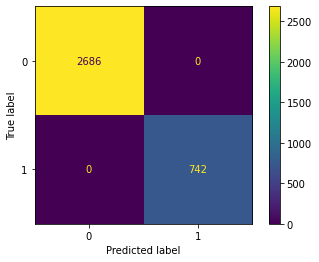

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1152
           1       0.70      0.64      0.67       318

    accuracy                           0.86      1470
   macro avg       0.80      0.78      0.79      1470
weighted avg       0.86      0.86      0.86      1470

Con una matriz de confusion:


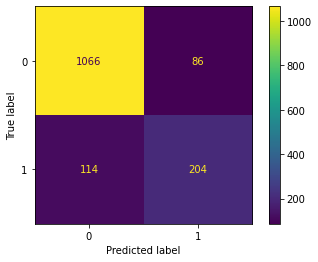

alcohol                0.171510
density                0.126875
volatile acidity       0.109193
free sulfur dioxide    0.107746
pH                     0.107119
chlorides              0.100239
fixed acidity          0.097447
citric acid            0.090057
sulphates              0.089813
dtype: float32


In [81]:
xgb_clf = xgb_random.best_estimator_
y_train_pred = xgb_clf.predict(x_train)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

y_test_pred = xgb_clf.predict(x_test)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## Feature importances
important_features = pd.Series(data=xgb_clf.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

In the end, we did not end up with a better f1-score optimizing hyperparameters. The biggest change we find is with regards to overfitting, because now it's much more noticeable, as we get perfect scores for training while maintaining the same scores as before in the testing set. 

We also can see that the feature importance matrix changed subtantially, alcohol importance dropped by almost half of what it was, and density again becomes the second most important feature.

We still have the issue of the imbalanced data, as we can see that for the bad wine class we have precision and recall metrics of 0.90 and 0.93, respectively. Meanwhile, for the good wine class those metrics drop to 0.70 and 0.64 respectively